In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

Selecting as resources just Omnipath

In [2]:
omnipath = op.interactions.OmniPath().get()

First set the folder for input and output

In [3]:
data_folder = "../../data/"

figures_folder = "../../Figures/"

sif_output = "../../sif_files/"

Loading the data from Antoine

In [4]:
data = pd.read_csv(data_folder + "discrete_data.csv")

In [5]:
data.fillna("", inplace=True)
data.reset_index(drop=True, inplace=True)

In [6]:
data

,WNT,SHH,Group 3,Group 4,WNT and Group 3,SHH and Group 3,Group 3 and Group 4,WNT and Group 3 and Group 4,WNT and SHH and Group 3 and Group 4
0,CSNK2B,DMRTA1,GABRA5,POU2F1,SMARCA4,TGFBR1,CHD7,LHX2,ZIC1
1,LEF1,BCOR,IMPG2,LHX1,,,KDM5A,,ZIC4
2,TP53,SMO,ANPRC,SIX2,,,KDM4C,,
3,PAX3,NHLH1,RARX2,LHX5,,,ZMYM3,,
4,HOXDB13,YAP1,MYC,ZNF35,,,EZH2,,
5,CTNNB1,LDB1,CRX,BARHL1,,,KDM6A,,
6,NKD2,PCNT,LIN28B,MLL3,,,KDM1A,,
7,NKD1,NFATC1,GBRA5,STAT5A,,,KDM3A,,
8,ONECUT2,SOX13,SMAD9,UNCX,,,KDM7A,,
9,EMX2,SUFU,LHX9,MYCN,,,KDM5B,,


Selecting just WNT group

In [7]:
wnt_list = set()

for column in data.columns:
    if "WNT" in column: 
        wnt_list = wnt_list.union(set(data[column].replace({"":None}).dropna()))   

print(wnt_list)

{'TENA', 'RUNX2', 'NKD2', 'ONECUT2', 'TP53', 'ZIC4', 'CTNNB1', 'MSX2', 'NKD1', 'CSNK2B', 'DMRT2', 'HOXDB13', 'LET7', 'HOXDB', 'MAF', 'LEF1', 'EMX2', 'DDX3X', 'LHX2', 'ZIC1', 'SMARCA4', 'PAX3'}


# Creating a Network starting from All Omnipath interactions

In [8]:
wnt_net = Network(wnt_list, resources = omnipath)

Error: node TENA is not present in the resources database
Error: node ZIC4 is not present in the resources database
Error: node DMRT2 is not present in the resources database
Error: node HOXDB13 is not present in the resources database
Error: node LET7 is not present in the resources database
Error: node HOXDB is not present in the resources database


Adding the node that were not found manually: HOXDB13 --> HOXD13, HOXDB --> HOXD9, Q8N9L1 --> ZIC4

In [9]:
wnt_net.add_node("HOXD13")

In [10]:
wnt_net.add_node("HOXD9")

In [11]:
wnt_net.nodes

,Genesymbol,Uniprot,Type
0,RUNX2,Q13950,NaN
1,NKD2,Q969F2,NaN
2,ONECUT2,O95948,NaN
3,TP53,P04637,NaN
4,CTNNB1,P35222,NaN
5,MSX2,P35548,NaN
6,NKD1,Q969G9,NaN
7,CSNK2B,P67870,NaN
8,MAF,O75444,NaN
9,LEF1,Q9UJU2,NaN


In [12]:
%%time
wnt_net.complete_connection(maxlen=4, only_signed=True, connect_with_bias=False, consensus=True)

CPU times: user 1min 3s, sys: 6.59 ms, total: 1min 3s
Wall time: 1min 3s


In [13]:
wnt_net.nodes

,Genesymbol,Uniprot,Type
0,RUNX2,Q13950,NaN
1,NKD2,Q969F2,NaN
2,ONECUT2,O95948,NaN
3,TP53,P04637,NaN
4,CTNNB1,P35222,NaN
...,...,...,...
93,GSK3A,P49840,NaN
94,HIC1,Q14526,NaN
95,SIRT1,Q96EB6,NaN
96,CDK4,P11802,NaN


In [14]:
wnt_net.edges

,source,target,Type,Effect,References
0,Q13950,Q92793,None,stimulation,SIGNOR:20551513; SIGNOR:20551513
1,Q92793,P04637,None,stimulation,ACSN:15279786;ACSN:17303408;ACSN:17660363;ACSN...
2,P04637,P01135,None,stimulation,SPIKE:18431400;SPIKE_LC:18431400; SPIKE:184314...
3,P01135,Q969F2,None,stimulation,Cellinker:27635238;HPRD:15064403;SIGNOR:187577...
4,Q92793,P35222,None,bimodal,BioGRID:16476742;CA1:10769018;HPRD-phos:119733...
...,...,...,...,...,...
347,P68400,P05412,None,inhibition,HPRD-phos:1516134;HPRD-phos:19413330;HPRD:1516...
348,P49840,Q9H1A4,None,stimulation,CA1:8638126;CA1:9601641
349,P49841,O15169,None,stimulation,ACSN:10421629;ACSN:10581160;ACSN:11487578;ACSN...
350,O15169,P49840,None,stimulation,CA1:10196136;CA1:11707456;CA1:9482734;CA1:9501...


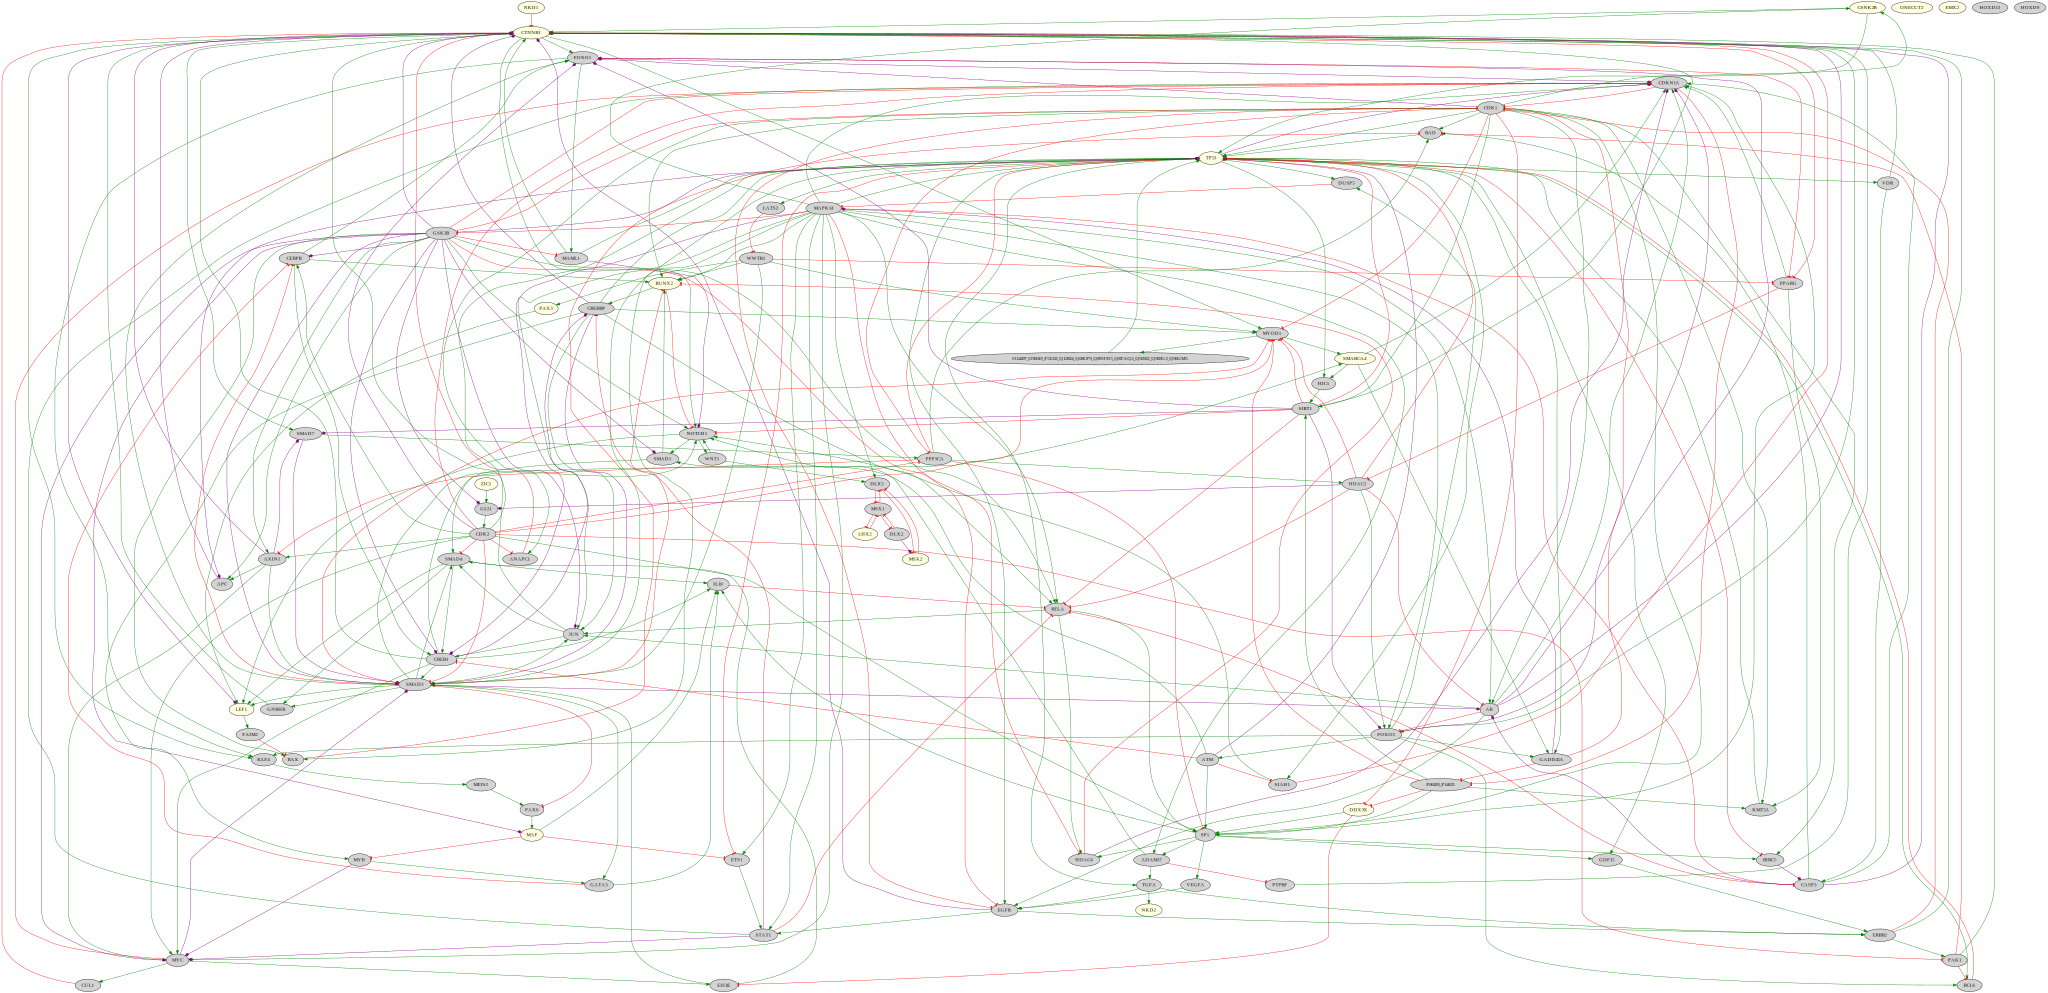

In [15]:
wnt_visualizer = NetworkVisualizer(wnt_net,color_by='effect', noi=True)
output = figures_folder + "WNT_all_omnipath"
wnt_visualizer.render(output_file=output)

# Exporting Network in sif file

In order to export a fully connected network in sif file, I remove the nodes that are not connected

In [29]:
from neko._outputs.exports import Exports

In [22]:
wnt_net.remove_node("EMX2")

In [23]:
wnt_net.remove_node("ONECUT2")

In [24]:
wnt_net.remove_node("HOXD13")

In [25]:
wnt_net.remove_node("HOXD9")

In [30]:
export = Exports(wnt_net)

In [31]:
export.export_sif(sif_output + "WNT_omnipath.sif")